In [1]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [2]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep
secondary_tmdb_dir = "E:\\Datasets\\themoviedb"

In [3]:
INT_df = pd.read_msgpack(secondary_tmdb_dir+os.sep+"INT_df.msgpack")

In [4]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [5]:
# INT_df["tmdbId"] = INT_df[search(INT_df,"tmdbId").index].fillna(method="ffill",axis=1)["SER_tmdbId"]#.notnull().sum()
# INT_df["movieId"] = INT_df[search(INT_df,"movieId").index].fillna(method="ffill",axis=1)["NUM_movieId"]#.notnull().sum()
# INT_df["uId"] = INT_df["tmdbId"].apply(lambda x: str(int(x)) if pd.notnull(x) else "NA")+"-"+INT_df["movieId"].apply(lambda x: str(int(x)) if pd.notnull(x) else "NA")

# # amalgamated tmbdId and movieIds

In [6]:
# INT_df = pd.read_msgpack(secondary_tmdb_dir+os.sep+"INT_df.msgpack")
# search(INT_df,"SER_")

In [7]:
# INT_df[search(INT_df,"release").index]

In [8]:
# drop_ind = INT_df[INT_df["uId"]=="527218-NA"].index
# INT_df.drop(drop_ind,inplace=True)

In [9]:
INT_df["TMB_release_date"].isnull().sum()

39228

In [10]:
INT_df["SER_releaseDate"].isnull().sum()

423946

In [ ]:
INT_df.loc[INT_df["movieId"]==89963,"SER_releaseDate"] = "1999-01-13" # Khrustalyov, My Car! https://www.imdb.com/title/tt0156701/?ref_=fn_al_tt_1
INT_df.loc[INT_df["movieId"]==77433,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # the ten commandments
INT_df.loc[INT_df["movieId"]==4916,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # Midway
INT_df.loc[INT_df["movieId"]==31485,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # The Professionals	
INT_df.loc[INT_df["movieId"]==110048,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # Grandma's Boy
INT_df.loc[INT_df["movieId"]==25940,["NUM_release_day","NUM_release_month","NUM_release_year","HETREC_year"]] = [np.nan,np.nan,np.nan,np.nan] # The Lady from Shanghai	
INT_df.loc[INT_df["movieId"]==70833,"SER_releaseDate"] = np.nan # Queen Kelly
INT_df.loc[INT_df["movieId"]==98394,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # Cry Wolf
INT_df.loc[INT_df["movieId"]==136088,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # The Best of Enemies	
INT_df.loc[INT_df["movieId"]==80269,["NUM_release_day","NUM_release_month","NUM_release_year"]] = [np.nan,np.nan,np.nan] # Above and Beyond
INT_df.loc[INT_df["movieId"]==64923,"SER_releaseDate"] = np.nan # The Blackbird

INT_df.loc[ INT_df["tmdbId"]==577462 ,  "TMB_release_date"] = pd.to_datetime("2019-01-24") # 24 January 2019	El Hijo Perdido (2019) https://www.imdb.com/title/tt8660084/releaseinfo?ref_=tt_dt_dt


In [11]:
# %%time
# I wonder if MovieLens would like to pay me for fixing their data?
# INT_df.loc[INT_df["movieId"]==8688,"SER_releaseDate"] = "1968-12-13" # Shalako 13 December 1968
# INT_df.loc[INT_df["movieId"]==33471,"SER_releaseDate"] = "2002-04-05" # https://www.imdb.com/title/tt0292553/?ref_=fn_al_tt_1
# INT_df.loc[INT_df["movieId"]==46121,"SER_releaseDate"] = "2001-06-01" # https://www.imdb.com/title/tt0135024/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==47991,"SER_releaseDate"] = "2005-06-09" # https://www.imdb.com/title/tt0383304/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==42941,"SER_releaseDate"] = "1974-08-08" # https://www.imdb.com/title/tt0071840/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==59300,"SER_releaseDate"] = "1986-09-12" # https://www.imdb.com/title/tt0090678/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==55631,"SER_releaseDate"] = "2006-03-17" # https://www.imdb.com/title/tt0443446/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==60034,"SER_releaseDate"] = "2007-01-22" # https://www.imdb.com/title/tt0893331/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==97703,"SER_releaseDate"] = "2012-05-07" # https://www.imdb.com/title/tt2209386/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==105159,"SER_releaseDate"] = "2012-07-13" # https://www.imdb.com/title/tt1859446/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==105453,"SER_releaseDate"] = "2013-09-19" # https://www.imdb.com/title/tt2717558/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==105855,"SER_releaseDate"] = "2013-10-11" # https://www.imdb.com/title/tt2286990/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==109455,"SER_releaseDate"] = "2014-02-21" # https://www.imdb.com/title/tt2980794/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==57486,"SER_releaseDate"] = "1970-10-23" # https://www.imdb.com/title/tt0066578/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==53502,"SER_releaseDate"] = "1948-04-27" # https://www.imdb.com/title/tt0040098/releaseinfo?ref_=tt_dt_dt
# INT_df.loc[INT_df["movieId"]==60049,"SER_releaseDate"] = "2007-05-30" # https://www.imdb.com/title/tt0832937/releaseinfo?ref_=tt_dt_dt

INT_df["SER_releaseDate"] = pd.to_datetime(INT_df["SER_releaseDate"].replace("0000-00-00",np.nan)).apply(lambda x: x.date())
## another problem - whole load of SER_releaseDates *just happen* to be the UNIX start date -> statistically improbable
# (yes, I checked whether it happened to be the data of a film festival - it was not!)
# also, more on one single date by an order of magnitude
matching_UNIX_start_date = INT_df["SER_releaseDate"]==pd.to_datetime("1969-12-31").date()
INT_df.loc[matching_UNIX_start_date,"SER_releaseDate"] = np.datetime64('NaT')

INT_df["SER_release_year"]  = INT_df["SER_releaseDate"].apply(lambda x: x.year if pd.notnull(x) else np.nan)
INT_df["SER_release_month"] = INT_df["SER_releaseDate"].apply(lambda x: x.month if pd.notnull(x) else np.nan)
INT_df["SER_release_day"]   = INT_df["SER_releaseDate"].apply(lambda x: x.day if pd.notnull(x) else np.nan)

INT_df["TMB_release_year"]  = INT_df["TMB_release_date"].apply(lambda x: x.year if pd.notnull(x) else np.nan)
INT_df["TMB_release_month"] = INT_df["TMB_release_date"].apply(lambda x: x.month if pd.notnull(x) else np.nan)
INT_df["TMB_release_day"]   = INT_df["TMB_release_date"].apply(lambda x: x.day if pd.notnull(x) else np.nan)

date_vars = ["TMB_release_date","SER_releaseDate"]
# hardfix SER and TMB, NUM_date looks fine
dates = INT_df[date_vars].applymap(lambda x: pd.to_datetime(x).date() if pd.notnull(x) else np.nan)
placeholder_month_day = dates.applymap(lambda x: (x.day==1) & (x.month==1) if pd.notnull(x) else np.nan)

INT_df.loc[ placeholder_month_day["TMB_release_date"]==True , "TMB_release_month" ] = np.nan
INT_df.loc[ placeholder_month_day["TMB_release_date"]==True , "TMB_release_day"   ] = np.nan

# Meh - no perfect solution - still waaay too many 1st of the month dates ...
# But we don't have enough data in NUM_date to compensate if you just toss them all out

# INT_df.loc[ INT_df["TMB_release_day"]==1 , "TMB_release_day"   ] = np.nan

INT_df.loc[ placeholder_month_day["SER_releaseDate" ]==True , "SER_release_month" ] = np.nan
INT_df.loc[ placeholder_month_day["SER_releaseDate" ]==True , "SER_release_day"   ] = np.nan
# INT_df.loc[ INT_df["SER_release_day"]==1 , "SER_release_day"   ] = np.nan


# this represents a very informal sensse of which source is most authoritative!
# TMB user content - least reliable, NUM website focused on accurate
# HETREC and SER are MovieLens data - not bad, but maybe not so well checked (HETREC in particular has problems)

# Concerned that HETREC is really very dodgy

In [12]:
release_year_cols = ['NUM_release_year','HETREC_year','TMB_release_year','SER_release_year']
INT_df["release_year"] = INT_df[release_year_cols].fillna(method="ffill",axis=1)[release_year_cols[-1]]
release_month_cols = ['NUM_release_month','TMB_release_month','SER_release_month']
INT_df["release_month"] = INT_df[release_month_cols].fillna(method="ffill",axis=1)[release_month_cols[-1]]
release_day_cols = ['NUM_release_day','TMB_release_day','SER_release_day']
INT_df["release_day"] = INT_df[release_day_cols].fillna(method="ffill",axis=1)[release_day_cols[-1]]

release_date_cols = ["TMB_release_date","SER_releaseDate"]
release_date = INT_df[release_date_cols].fillna(method="ffill",axis=1)[release_date_cols[-1]]
release_date = pd.to_datetime(release_date)
day_and_month_not_actually_given = (INT_df["release_day"]==1) & (INT_df["release_month"]==1)

In [13]:
match(INT_df,"release")

release_year     431740
release_month    366520
release_day      366520
dtype: int64

In [14]:
release_decade = INT_df["release_year"].apply(lambda x: str(int(10*np.floor(x/10))) if pd.notnull(x) else np.nan)
# release_decade_dummies = pd.get_dummies(release_decade , prefix = "release_decade__")

In [15]:
import calendar
from datetime import date
release_month = INT_df['release_month'].apply(lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else np.nan)
release_month[day_and_month_not_actually_given] = np.nan
# release_month_dummies = pd.get_dummies(release_month , prefix = "release_month__")
release_month.value_counts()

Oct    37336
Sep    33673
Nov    33186
Dec    32212
Mar    31766
Apr    31270
Jun    30636
Jan    29616
May    29198
Feb    27672
Aug    25930
Jul    23985
Name: release_month, dtype: int64

In [16]:
# day in month
release_day = INT_df['release_day'].copy()#.apply(lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else np.nan)
release_day.loc[day_and_month_not_actually_given] = np.nan
# release_day_dummies = pd.get_dummies(release_day , prefix = "release_day_of_the_month__")
# release_day_dummies.columns = release_day_dummies.columns.astype('int')
release_day.value_counts()

1.0     29555
2.0     14952
15.0    12692
10.0    12533
25.0    12029
6.0     11965
14.0    11838
20.0    11699
11.0    11699
12.0    11671
5.0     11655
9.0     11262
7.0     11186
21.0    11179
22.0    11106
4.0     11013
13.0    10931
8.0     10876
18.0    10876
23.0    10853
3.0     10841
24.0    10834
26.0    10826
16.0    10773
17.0    10685
19.0    10631
28.0    10584
30.0    10567
27.0    10463
29.0     9609
31.0     9097
Name: release_day, dtype: int64

In [17]:
release_weekday = release_date.apply(lambda x: calendar.day_name[x.weekday()] if pd.notnull(x) else np.nan)
release_weekday.loc[day_and_month_not_actually_given] = np.nan
# release_weekday_dummies = pd.get_dummies(release_weekday , prefix = "release_weekday__")
release_weekday.value_counts()

Friday       91588
Thursday     69162
Wednesday    61275
Tuesday      57179
Saturday     57177
Monday       48678
Sunday       46620
Name: SER_releaseDate, dtype: int64

In [18]:
# INT_df[release_weekday_dummies.columns]=release_weekday_dummies
# INT_df[release_day_dummies.columns]    = release_day_dummies
# INT_df[release_month_dummies.columns]  = release_month_dummies
# INT_df[release_decade_dummies.columns] = release_decade_dummies

In [19]:
INT_df["release_weekday_text"]=release_weekday
INT_df["release_day_of_the_month"]    =release_day
INT_df["release_month_text"]  =release_month
INT_df["release_decade"] =release_decade

In [20]:
# release_year, release_month, release_day
# release_decade, release_weekday_text (e.g. "Monday"), release_day_of_the_month, release_month_text (e.g. "July"), 


In [21]:
INT_df[["release_year","release_month","release_day","release_decade",
        "release_weekday_text","release_day_of_the_month","release_month_text"]].notnull().sum()

release_year                431740
release_month               366520
release_day                 366520
release_decade              431740
release_weekday_text        431679
release_day_of_the_month    366480
release_month_text          366480
dtype: int64

In [22]:
search(INT_df,"TMB_birth_yrs_rel_1900").index

Index(['TMB_birth_yrs_rel_1900_crew_mean', 'TMB_birth_yrs_rel_1900_cast_mean',
       'TMB_birth_yrs_rel_1900_crew_lead', 'TMB_birth_yrs_rel_1900_cast_lead',
       'TMB_birth_yrs_rel_1900_crew_lead5',
       'TMB_birth_yrs_rel_1900_cast_lead5',
       'TMB_birth_yrs_rel_1900_crew_second',
       'TMB_birth_yrs_rel_1900_cast_second'],
      dtype='object')

In [23]:
search(INT_df,"TMB_death_yrs_rel_1900").index

Index(['TMB_death_yrs_rel_1900_crew_mean', 'TMB_death_yrs_rel_1900_cast_mean',
       'TMB_death_yrs_rel_1900_crew_lead', 'TMB_death_yrs_rel_1900_cast_lead',
       'TMB_death_yrs_rel_1900_crew_lead5',
       'TMB_death_yrs_rel_1900_cast_lead5',
       'TMB_death_yrs_rel_1900_crew_second',
       'TMB_death_yrs_rel_1900_cast_second'],
      dtype='object')

In [24]:
import datetime
from dateutil.relativedelta import relativedelta

def yrs_rel_1900(date):
    ref_date = datetime.datetime(1900,1,1,0,0,0,0)
    difference = relativedelta(date, ref_date)
    return difference.years + (difference.months/12) + (difference.days/365.25)

In [25]:
release_dates_df = INT_df[["release_year","release_month","release_day"]].copy()
release_dates_df.columns  = ["year","month","day"]
release_dates_df["month"] = release_dates_df["month"].fillna(7)
release_dates_df["day"]   = release_dates_df["day"].fillna(2)
release_dates_df = release_dates_df.dropna().astype('int')
release_dates_df = pd.to_datetime(release_dates_df,errors='coerce').dropna()

In [26]:
release_dates_df.notnull().sum()

431739

In [27]:
release_date.notnull().sum()

431719

In [28]:
INT_df["release_year"].notnull().sum()

431740

In [29]:
release_date_yrs_rel_1900 = release_dates_df.apply(lambda x: yrs_rel_1900(x))

In [30]:
INT_df["release_date_yrs_rel_1900"] = release_date_yrs_rel_1900

In [31]:
search(INT_df,"TMB_death_yrs_rel_1900")

TMB_death_yrs_rel_1900_crew_mean       94458
TMB_death_yrs_rel_1900_cast_mean      122674
TMB_death_yrs_rel_1900_crew_lead       69607
TMB_death_yrs_rel_1900_cast_lead       30425
TMB_death_yrs_rel_1900_crew_lead5      89108
TMB_death_yrs_rel_1900_cast_lead5     103183
TMB_death_yrs_rel_1900_crew_second     36749
TMB_death_yrs_rel_1900_cast_second     59036
dtype: int64

In [32]:
# [x.replace("TMB_birth_yrs_rel_1900","TMB_age_at_release") for x in search(INT_df,"TMB_birth_yrs_rel_1900").index]

In [33]:
# INT_df[search(INT_df,"TMB_birth_yrs_rel_1900").index[0:1]].apply(lambda x: x-release_date_yrs_rel_1900,axis=1)# - release_date_yrs_rel_1900)

In [34]:
for col in search(INT_df,"TMB_birth_yrs_rel_1900").index:
    INT_df[col.replace("TMB_birth_yrs_rel_1900","TMB_age_at_release")] = INT_df["release_date_yrs_rel_1900"] - INT_df[ col ]

In [35]:
for col in search(INT_df,"TMB_death_yrs_rel_1900").index:
    INT_df[col.replace("TMB_death_yrs_rel_1900","TMB_years_until_death")] = INT_df[ col ] - INT_df["release_date_yrs_rel_1900"]

In [36]:
# genre data: HETREC/SER/ML/TMB
    # HETREC and ML already broken into dummies
    
# TMB_genres
# SER_genres_list

In [37]:
search(INT_df,"TMB_years_until_death")

TMB_years_until_death_crew_mean       93975
TMB_years_until_death_cast_mean      122115
TMB_years_until_death_crew_lead       69286
TMB_years_until_death_cast_lead       30409
TMB_years_until_death_crew_lead5      88646
TMB_years_until_death_cast_lead5     102715
TMB_years_until_death_crew_second     36649
TMB_years_until_death_cast_second     58799
dtype: int64

In [38]:
search(INT_df,"TMB_age_at_release")

TMB_age_at_release_crew_mean      185390
TMB_age_at_release_cast_mean      236311
TMB_age_at_release_crew_lead      144763
TMB_age_at_release_cast_lead       96959
TMB_age_at_release_crew_lead5     178399
TMB_age_at_release_cast_lead5     228851
TMB_age_at_release_crew_second     78691
TMB_age_at_release_cast_second    176863
dtype: int64

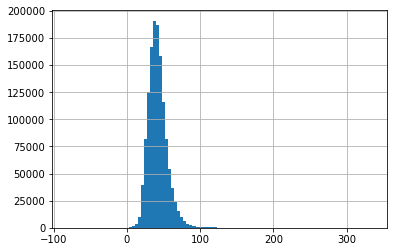

In [41]:
INT_df[search(INT_df,"TMB_age_at_release").index].stack().hist(bins=100)

In [48]:
negative_age_cast = (INT_df[search(INT_df,"TMB_age_at_release").index]<=0).sum(axis=1)
negative_age_cast.value_counts()

0    469834
1        90
2        31
3        30
6         4
4         4
7         2
dtype: int64

In [84]:
INT_df.loc[ negative_age_cast[negative_age_cast==1].index ,["tmdbId","movieId","TMB_title","release_date_yrs_rel_1900","release_day","release_month","release_year","SER_release_year","NUM_release_year","HETREC_year","TMB_release_date"]]

,tmdbId,movieId,TMB_title,release_date_yrs_rel_1900,release_day,release_month,release_year,SER_release_year,NUM_release_year,HETREC_year,TMB_release_date
725,5050.0,NaN,Devil's Ransom,74.218686,20.0,3.0,1974.0,NaN,NaN,NaN,1974-03-20
3994,25696.0,NaN,Get Ready to Be Boyzvoiced,100.916667,1.0,12.0,2000.0,NaN,NaN,NaN,2000-12-01
8671,40073.0,NaN,A Mouse in the House,47.662731,30.0,8.0,1947.0,NaN,NaN,NaN,1947-08-30
8744,40234.0,NaN,The Midnight Snack,41.502738,NaN,NaN,1941.0,NaN,NaN,NaN,1941-01-01
13816,51777.0,NaN,Alice Gets in Dutch,24.833333,1.0,11.0,1924.0,NaN,NaN,NaN,1924-11-01
14699,53612.0,NaN,The Lovable Cheat,49.360712,11.0,5.0,1949.0,NaN,NaN,NaN,1949-05-11
25976,74530.0,NaN,Nit-Witty Kitty,51.763689,6.0,10.0,1951.0,NaN,NaN,NaN,1951-10-06
26604,75658.0,NaN,Polka-Dot Puss,49.151780,26.0,2.0,1949.0,NaN,NaN,NaN,1949-02-26
26822,76015.0,NaN,Push-Button Kitty,52.680356,6.0,9.0,1952.0,NaN,NaN,NaN,1952-09-06
34841,91273.0,NaN,Lusting Hours,67.502738,NaN,NaN,1967.0,NaN,NaN,NaN,1967-01-01


In [85]:
negative_time_to_death = (INT_df[search(INT_df,"TMB_years_until_death").index]<=0).sum(axis=1)
negative_time_to_death.value_counts()

0    458795
3      3845
1      3473
2      3213
4       437
6        98
5        78
7        45
8        11
dtype: int64

In [89]:
INT_df.loc[ negative_time_to_death[negative_time_to_death>=5].index ,["tmdbId","movieId","TMB_title","release_date_yrs_rel_1900","release_day","release_month","release_year","SER_release_year","NUM_release_year","HETREC_year","TMB_release_date"]].sort_values(by="HETREC_year")

,tmdbId,movieId,TMB_title,release_date_yrs_rel_1900,release_day,release_month,release_year,SER_release_year,NUM_release_year,HETREC_year,TMB_release_date
415608,11360.0,1029.0,Dumbo,119.243326,29.0,3.0,2019.0,1941.0,2019.0,1941.0,1941-10-22
419533,18983.0,5640.0,"Godzilla, King of the Monsters!",119.415469,31.0,5.0,2019.0,1956.0,2019.0,1956.0,1956-04-27
412219,2786.0,7748.0,Pierrot le Fou,107.454997,15.0,6.0,2007.0,1969.0,2007.0,1965.0,1965-08-29
416617,13187.0,26133.0,A Charlie Brown Christmas,109.763689,6.0,10.0,2009.0,1965.0,2009.0,1965.0,1965-12-09
438103,72086.0,3348.0,The Night Visitor,115.857974,10.0,11.0,2015.0,1971.0,2015.0,1971.0,1971-02-10
414734,10238.0,4422.0,Cries and Whispers,115.248802,31.0,3.0,2015.0,1972.0,2015.0,1972.0,1972-12-21
418956,17810.0,26270.0,Lone Wolf and Cub: Baby Cart at the River Styx,97.073922,28.0,1.0,1997.0,1997.0,NaN,1972.0,1972-04-27
415664,11422.0,4916.0,Midway,119.852498,8.0,11.0,2019.0,1976.0,2019.0,1976.0,1976-06-18
428680,41878.0,526.0,Savage Nights,94.149042,25.0,2.0,1994.0,1994.0,NaN,1992.0,1992-08-19
417287,14275.0,246.0,Hoop Dreams,94.785592,14.0,10.0,1994.0,1994.0,1994.0,1994.0,1994-09-12


In [90]:
tmdb_dir = create_subdir(Dataset_directory, "themoviedb")
TMB_crew_individuals = pd.read_msgpack(tmdb_dir + "TMB_crew_individuals.msgpack")
TMB_cast_individuals = pd.read_msgpack(tmdb_dir + "TMB_cast_individuals.msgpack")

# wrong actor date
# Born	Egbert Austin Williams
# November 12, 1874
# Nassau, Bahamas
# Died	March 4, 1922 (aged 47)
# 68022	174556.0	NaN	A Natural Born Gambler	
# 179997	344258.0	NaN	Fish
TMB_crew_individuals.loc[49938,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[12,11,1874, 4,3,1922]
TMB_cast_individuals.loc[49938,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[12,11,1874, 4,3,1922]
# confusing Zachary Behm - directing on the day of his birth!
TMB_crew_individuals.loc[2064818,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,np.nan, np.nan,np.nan,np.nan]
TMB_cast_individuals.loc[2064818,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,np.nan, np.nan,np.nan,np.nan]
# 35962	94737.0	NaN	The Curse of Her Flesh	
# 31984	84629.0	NaN	The Sin Syndicate
# Michael Findlay https://en.wikipedia.org/wiki/Michael_Findlay
# Born	August 27, 1937
# United States
# Died	May 16, 1977 (aged 39)
# New York City, New York, United States
TMB_crew_individuals.loc[236380,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,np.nan, np.nan,np.nan,np.nan]
TMB_cast_individuals.loc[236380,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,np.nan, np.nan,np.nan,np.nan]
TMB_crew_individuals.loc[236380,"gender"] = 2
TMB_cast_individuals.loc[236380,"gender"] = 2
# Sophia de Mello Breyner Andresen https://en.wikipedia.org/wiki/Sophia_de_Mello_Breyner_Andresen
TMB_crew_individuals.loc[2287233,["birth_year"]] =[1919]
TMB_cast_individuals.loc[2287233,["birth_year"]] =[1919]
TMB_crew_individuals.loc[2287233,"gender"] = 1
TMB_cast_individuals.loc[2287233,"gender"] = 1


# Julio Salvador https://www.imdb.com/name/nm0759238/?ref_=tt_ov_dr
# 1906 -> May 9, 1974
TMB_crew_individuals.loc[40895,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1906, 9,5,1974]
TMB_cast_individuals.loc[40895,["birth_day","birth_month","birth_year","death_day","death_month","death_year"]]\
    =[np.nan,np.nan,1906, 9,5,1974]


TMB_crew_individuals.to_msgpack(tmdb_dir + "TMB_crew_individuals.msgpack")
TMB_cast_individuals.to_msgpack(tmdb_dir + "TMB_cast_individuals.msgpack")

In [150]:
crew_df = pd.read_msgpack(tmdb_dir + "TMB_crew.msgpack")
cast_df = pd.read_msgpack(tmdb_dir + "TMB_cast.msgpack")

In [125]:
cast_df[cast_df["tmdb_id"]==2]

,cast_id,character,credit_id,gender,id,order,tmdb_id,max_order,fractional_order,gender_guess_integrated,credit_number,cast_crew_overlap,adult,popularity
3893,3,Taisto Olavi Kasurinen,52fe420dc3a36847f8000029,2,54768,0,2,3,0.000000,1.0,3.0,0.0,0.0,0.600
3894,4,Irmeli Katariina Pihlaja,52fe420dc3a36847f800002d,1,54769,1,2,3,0.333333,0.0,8.0,0.0,0.0,0.980
3895,5,Mikkonen,52fe420dc3a36847f8000031,2,4826,2,2,3,0.666667,1.0,40.0,0.0,0.0,1.315
3896,6,Riku,52fe420dc3a36847f8000035,2,54770,3,2,3,1.000000,1.0,1.0,0.0,0.0,0.600


In [120]:
min_orders[ min_orders==51 ]

tmdb_id
308904    51
Name: order, dtype: uint16

In [126]:
# cast_df["max_order"] = cast_df.groupby("tmdb_id")["order"].count()-1
# cast_df["order"] = flatten([list(range(0,x)) for x in (cast_df["max_order"].values+1) if x>0])

,order,original_order,max_order
0,0,0,12
1,1,1,12
2,2,2,12
3,3,3,12
4,0,4,12
5,1,5,12
6,2,6,12
7,3,7,12
8,4,8,12
9,5,9,12


In [151]:
max_order.head(10)

tmdb_id
2       3
3       6
5      23
6      14
9       1
11    106
12     25
13     70
14     39
15    150
Name: order, dtype: int64

In [153]:
## fix cast_df order column!

cast_df = cast_df.sort_values(by = ["tmdb_id","order"],ascending=True)
cast_df["original_order"] = cast_df["order"]
max_order = cast_df.groupby("tmdb_id")["order"].count()-1
cast_df["max_order"] = cast_df.apply(lambda x: max_order.loc[x["tmdb_id"]],axis=1)
cast_df["order"] = flatten([list(range(0,x)) for x in (max_order+1) if x>0])
cast_df[["order","original_order","max_order"]]

,order,original_order,max_order
3893,0,0,3
3894,1,1,3
3895,2,2,3
3896,3,3,3
3897,0,0,6
3898,1,1,6
3899,2,2,6
3900,3,3,6
3901,4,4,6
3902,5,5,6


In [158]:
cast_df[cast_df["order"]==0]["gender_guess_integrated"].value_counts(dropna=False)

1.0    196843
0.0    107070
NaN     19594
Name: gender_guess_integrated, dtype: int64

In [159]:
cast_df[cast_df["order"]==1]["gender_guess_integrated"].value_counts(dropna=False)

1.0    149686
0.0    120613
NaN     19970
Name: gender_guess_integrated, dtype: int64

In [160]:
cast_df[cast_df["order"]==2]["gender_guess_integrated"].value_counts(dropna=False)

1.0    147398
0.0    101262
NaN     19586
Name: gender_guess_integrated, dtype: int64

In [165]:
(crew_df[crew_df["order"]==0]["birth_yrs_rel_1900"]>0).value_counts(dropna=False)

False    246249
True     125569
Name: birth_yrs_rel_1900, dtype: int64

In [166]:
(crew_df[crew_df["order"]==0]["death_yrs_rel_1900"]>0).value_counts(dropna=False)

False    302515
True      69303
Name: death_yrs_rel_1900, dtype: int64

In [107]:
crew_df[ (crew_df["job"]=="Director") & (crew_df["order"]<3) ]["gender_guess_integrated"].value_counts(dropna=False)

1.0    305715
0.0     46851
NaN     34474
Name: gender_guess_integrated, dtype: int64

In [156]:
for trait in [ "gender_guess_integrated","credit_number","cast_crew_overlap","adult","popularity" ]:
    print(trait)
    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
    cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values

gender_guess_integrated
credit_number
cast_crew_overlap
adult
popularity


In [163]:
for trait in search(TMB_cast_individuals,"_yrs_rel_1900").index:
    print(trait)
    crew_df[trait] = TMB_crew_individuals.loc[crew_df["id"],trait].values
    cast_df[trait] = TMB_cast_individuals.loc[cast_df["id"],trait].values


birth_yrs_rel_1900
death_yrs_rel_1900


In [ ]:
# release_date seems reasonable


# 20483	65008.0	NaN	The Bosnian Pyramids: The Biggest 

In [ ]:
# MOVIEID_TMDBID MATCH ERROR
# 143750.0	2223.0 should be 35832-2223 (The Farmers Wife)
# 446960	125409.0	98643.0	Kiss and Tell	should be 256300-98643
# 448668	141210.0	1115.0	The Sleepover -> should be 277102-1115


In [ ]:
# https://www.themoviedb.org/person/240056-michele-martin?language=en-US
# actress with a common name confounding two different actresses!




# https://www.themoviedb.org/person/89612-jack-white?language=en-US
# They got the wrong "Jack White"!
# https://www.themoviedb.org/person/13611-jack-white?language=en-US -> https://www.themoviedb.org/person/89612-jack-white?language=en-US



# one name with two people!
# https://www.themoviedb.org/person/1150484-marion-jackson


In [ ]:
# 412503	3766.0	25940.0	The Lady from Shanghai	 1947 (but lots of other dates are re-releases 2010+)

In [20]:
# genres

In [21]:
# SER_genre_set = list(set(flatten(INT_df["SER_genres_list"].dropna() ) ) )

# # INT_df["SER_genres_list"] = INT_df["SER_genres_list"].apply(lambda x: eval(x) if pd.notnull(x) else np.nan)
# flat_list = [item for sublist in INT_df["SER_genres_list"].dropna().values for item in sublist]
# genres = pd.DataFrame(flat_list).drop_duplicates()#.sort_values(by="movieId")

# for gen_ind in genres.index:
#     gen_name = "SER_genres__"+genres.loc[gen_ind,0]
#     INT_df[gen_name] = INT_df["SER_genres_list"].apply(lambda x: genres.loc[gen_ind,0] in x if isinstance(x,list) or pd.notnull(x) else np.nan)

# SER_genre_vars = search(INT_df,"SER_genres__[A-Z]",case_sensitive=True)
# SER_genre_vars

In [22]:
# tmdb_dir = create_subdir(Dataset_directory, "themoviedb")

# genre_categories = pd.read_msgpack( tmdb_dir + "genres.msgpack")
# genre_categories.set_index("id",inplace=True)# = genre_categories.id

In [23]:
# TMB_genre_set = list(genre_categories["name"].values)
# TMB_genre_set

In [24]:
# INT_df["TMB_genres"][0:10].apply(lambda x: [genre_categories.loc[y,"name"] for y in x])

In [25]:
# # SER_genre_set = list(set(flatten(INT_df["SER_genres_list"].dropna() ) ) )

# # INT_df["SER_genres_list"] = INT_df["SER_genres_list"].apply(lambda x: eval(x) if pd.notnull(x) else np.nan)
# # flat_list = [item for sublist in INT_df["TMB_genres"].dropna().values for item in sublist]
# genres = pd.DataFrame(TMB_genre_set).drop_duplicates()#.sort_values(by="movieId")

# for gen_ind in genres.index:
#     gen_name = "TMB_genres__"+genres.loc[gen_ind,0]
#     INT_df[gen_name] = INT_df["TMB_genres"].apply(lambda x: genre_categories.index[gen_ind] in x if isinstance(x,list) or pd.notnull(x) else np.nan)


    
# TMB_genre_vars = search(INT_df,"TMB_genres__[A-Z]",case_sensitive=True)
# INT_df[ TMB_genre_vars.index ] = INT_df[ TMB_genre_vars.index].replace(True,1).replace(False,0).astype('float32')    
# TMB_genre_vars




In [26]:
# INT_df[ search(INT_df,"TMB_genres__[A-Z]",case_sensitive=True).index] = INT_df[ search(INT_df,"TMB_genres__[A-Z]",case_sensitive=True).index].replace(True,1).replace(False,0).astype('float32')

In [27]:
# ML_genre_vars = search(INT_df,"ML_genres__[A-Z]",case_sensitive=True)

In [28]:
# INT_df.drop( ["TMB_genres"] , axis=1, inplace=True)

In [117]:
INT_df.rename(columns={"TMB_genres__Science Fiction": "TMB_genres__Sci-Fi"}, inplace=True)
INT_df.rename(columns={"TMB_genres__Family": "TMB_genres__Children"}, inplace=True)
INT_df.drop("HETREC_genres__Short",axis=1,inplace=True)
 

In [118]:
ML_genre_vars = search(INT_df,"ML_genres__[A-Z]",case_sensitive=True)

ML_common_genres = [x.replace("ML_genres__","") for x in ML_genre_vars.index]
TMB_only_genres = ["History","Music","TV Movie"] # foreign dropped
for genre in ML_common_genres:
#     INT_df["genre__"+genre] = 
    print(genre)
    if ('TMB_genres__'+genre) in INT_df.columns:
        gen_vars = ['TMB_genres__'+genre,'HETREC_genres__'+genre,'SER_genres__'+genre,'ML_genres__'+genre]
    else:
        gen_vars = ['HETREC_genres__'+genre,'SER_genres__'+genre,'ML_genres__'+genre]
    INT_df["genre__"+genre] = INT_df[gen_vars].fillna(method="ffill",axis=1)[gen_vars[-1]]
    
for genre in TMB_only_genres:
    gen_var = 'TMB_genres__'+genre
    INT_df["genre__"+genre]  = INT_df[gen_var]
    

int_genres = search(INT_df,"genre__",case_sensitive=True).index     
INT_df[int_genres] = INT_df[int_genres].astype("float32")

Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Mystery
Sci-Fi
IMAX
Documentary
War
Musical
Western
Film-Noir


In [119]:
# TMB_only_genres = ["History","Music","TV Movie"]
# for genre in TMB_only_genres:
#     gen_var = 'TMB_genres__'+genre
#     INT_df["genre__"+genre]  = INT_df[gen_var]
    
# int_genres = search(INT_df,"genre__",case_sensitive=True).index    
# INT_df[int_genres] = INT_df[int_genres].astype('float')

In [120]:
# INT_df[int_genres].dtypes

In [121]:
INT_df.to_msgpack(secondary_tmdb_dir+os.sep+"INT_df_with_dates_and_genres.msgpack")

In [39]:
INT_df[int_genres].describe()

,genre__Adventure,genre__Animation,genre__Children,genre__Comedy,genre__Fantasy,genre__Romance,genre__Drama,genre__Action,genre__Crime,genre__Thriller,...,genre__Sci-Fi,genre__IMAX,genre__Documentary,genre__War,genre__Musical,genre__Western,genre__Film-Noir,genre__History,genre__Music,genre__TV Movie
count,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,...,470047.000000,59431.000000,470047.000000,470047.000000,59431.000000,470047.000000,59431.000000,467917.000000,467917.000000,467917.000000
mean,0.028559,0.042598,0.030544,0.149394,0.020528,0.055635,0.223224,0.052942,0.036735,0.049338,...,0.022221,0.003348,0.114182,0.012275,0.019350,0.010865,0.006243,0.014693,0.045314,0.015781
std,0.166563,0.201949,0.172078,0.356476,0.141797,0.229215,0.416408,0.223917,0.188110,0.216572,...,0.147402,0.057769,0.318033,0.110112,0.137754,0.103667,0.078763,0.120320,0.207991,0.124626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
INT_df[int_genres].notnull().sum()

genre__Adventure      470047
genre__Animation      470047
genre__Children       470047
genre__Comedy         470047
genre__Fantasy        470047
genre__Romance        470047
genre__Drama          470047
genre__Action         470047
genre__Crime          470047
genre__Thriller       470047
genre__Horror         470047
genre__Mystery        470047
genre__Sci-Fi         470047
genre__IMAX            59431
genre__Documentary    470047
genre__War            470047
genre__Musical         59431
genre__Western        470047
genre__Film-Noir       59431
genre__History        467917
genre__Music          467917
genre__TV Movie       467917
dtype: int64

In [45]:
INT_df.shape

(469995, 360)

In [46]:
INT_df.notnull().sum()

TMB_adult                            467916
TMB_alternative_titles               111092
TMB_backdrop_path                    157779
TMB_belongs_to_collection             11824
TMB_budget                            21106
TMB_homepage                          49958
TMB_tmdbId                           467916
TMB_imdbId                           335181
TMB_keywords                         156737
TMB_original_language                467916
TMB_original_title                   467916
TMB_overview                         387434
TMB_popularity                       467916
TMB_poster_path                      373916
TMB_production_companies             201842
TMB_production_countries             268652
TMB_release_date                     430767
TMB_revenue                           11060
TMB_runtime                          337082
TMB_spoken_languages                 274787
TMB_status                           467916
TMB_tagline                           70562
TMB_title                       

In [24]:
search(INT_df,"runtime")

TMB_runtime    337083
dtype: int64

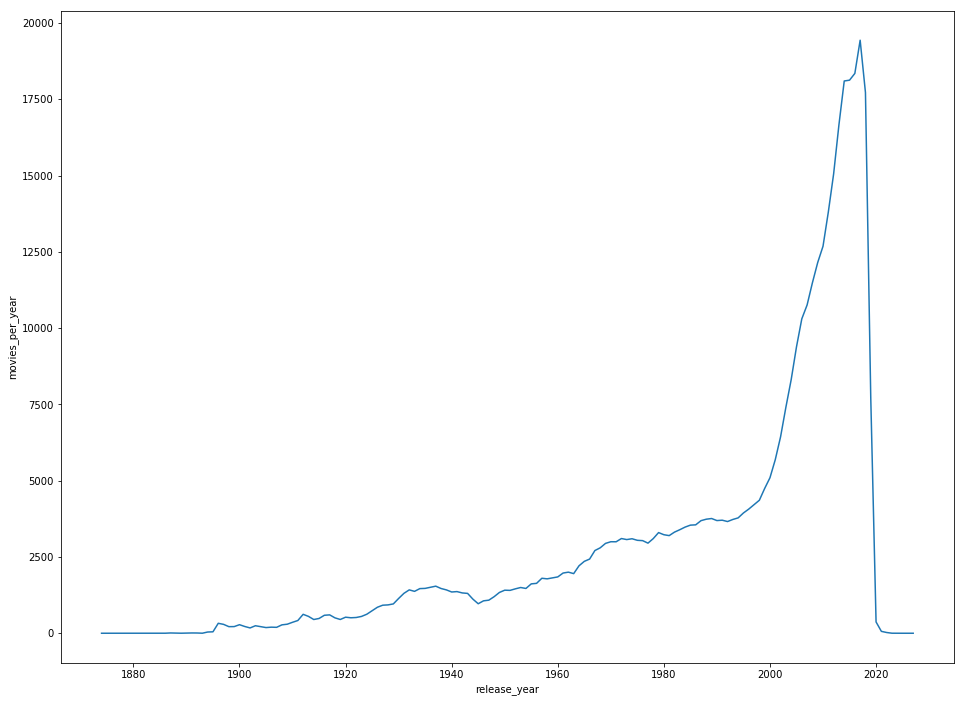

In [25]:
## (0) Release Year x Movie number
# movies per year / snapshot of dataset coverage

plt.figure(figsize=(16,12));
sns.lineplot(INT_df.groupby("release_year").count().index,INT_df.groupby("release_year").count()["uId"]);
plt.ylabel("movies_per_year");

In [147]:
INT_df[ INT_df["TMB_runtime"]>300 ][["single_genres","TMB_title","release_year","TMB_runtime","TMB_adult"]].sort_values(by="TMB_runtime")

,single_genres,TMB_title,release_year,TMB_runtime,TMB_adult
409966,NaN,Pourquoi la guerre aujourd’hui?,2015.0,301.0,False
330527,NaN,Animelo Summer Live 2016 刻-TOKI- 8.26,2017.0,301.0,False
278796,Music,Animelo Summer Live 2015 -THE GATE- 8.30,2016.0,301.0,False
322132,Crime,Widows 2,1985.0,301.0,False
328610,Romance,Adventures with the Baumgartners,2017.0,301.0,True
396839,NaN,Raw 26,2016.0,301.0,True
338764,Fantasy,Big Beautiful Women 2,2018.0,301.0,True
400212,NaN,The Ass Party 3,2013.0,302.0,True
348605,NaN,The Young & the Beautiful 3,2016.0,302.0,True
281537,NaN,NJPW Wrestle Kingdom 7,2013.0,302.0,False


In [159]:
INT_df[INT_df["uId"]=="NA-5176"].notnull().sum().sort_values(ascending=False).head(50)

uId                           5
movieId                       5
genre__Horror                 3
genre__Adventure              3
genre__Animation              3
genre__Children               3
genre__Comedy                 3
genre__Romance                3
genre__Drama                  3
genre__Action                 3
genre__Crime                  3
genre__Thriller               3
genre__Fantasy                3
genre__Mystery                3
genre__Musical                3
genre__Sci-Fi                 3
genre__Film-Noir              3
genre__Western                3
single_genres                 3
genre__Documentary            3
genre__IMAX                   3
genre__War                    3
release_decade                2
release_year                  2
SER_ratings_n                 1
SER_imdbId                    1
SER_num_starring              1
SER_starring_list             1
SER_num_genres                1
SER_num_directors             1
SER_director_list             1
SER_titl

In [160]:
INT_df["uId"].value_counts()[INT_df["uId"].value_counts()>1]
# 910 overlaps!

NA-5176      5
NA-2851      4
NA-1434      4
NA-4051      4
NA-32600     4
NA-769       4
NA-2270      4
NA-2258      4
NA-5738      4
NA-1421      4
NA-52281     4
NA-6955      4
NA-62336     3
NA-26379     3
NA-864       3
NA-106076    3
NA-1533      3
NA-101172    3
NA-62972     3
NA-7842      3
NA-4484      3
NA-75402     3
NA-96298     3
NA-38198     3
NA-31026     3
NA-89211     3
NA-1107      3
NA-106914    3
NA-1630      3
NA-90273     3
            ..
NA-26426     2
NA-185231    2
NA-147122    2
NA-55424     2
NA-102672    2
NA-60816     2
NA-157793    2
NA-53819     2
NA-38624     2
NA-44757     2
NA-163026    2
NA-180263    2
NA-187211    2
NA-27690     2
NA-81758     2
NA-120841    2
NA-26149     2
NA-26959     2
NA-26453     2
NA-107780    2
NA-48268     2
NA-178755    2
NA-27439     2
NA-7669      2
NA-176997    2
NA-107718    2
NA-93391     2
NA-159819    2
NA-64959     2
NA-170727    2
Name: uId, Length: 910, dtype: int64

In [181]:
# 527218-NA delete!

# INT_df.loc[320610].dropna()

In [84]:
search(INT_df,"title")

TMB_alternative_titles        467917
TMB_original_title            467917
TMB_title                     467917
TMB_num_alternative_titles    467917
HETREC_title                   10197
HETREC_spanishTitle            10197
SER_title                      49172
ML_title                       58098
NUM_title                       5252
dtype: int64

In [28]:
stupidly_long_movies = INT_df["TMB_runtime"]>300

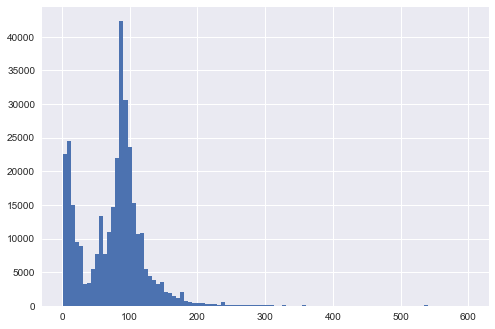

In [171]:
INT_df["TMB_runtime"][INT_df["TMB_runtime"]<=600].hist(bins=100)

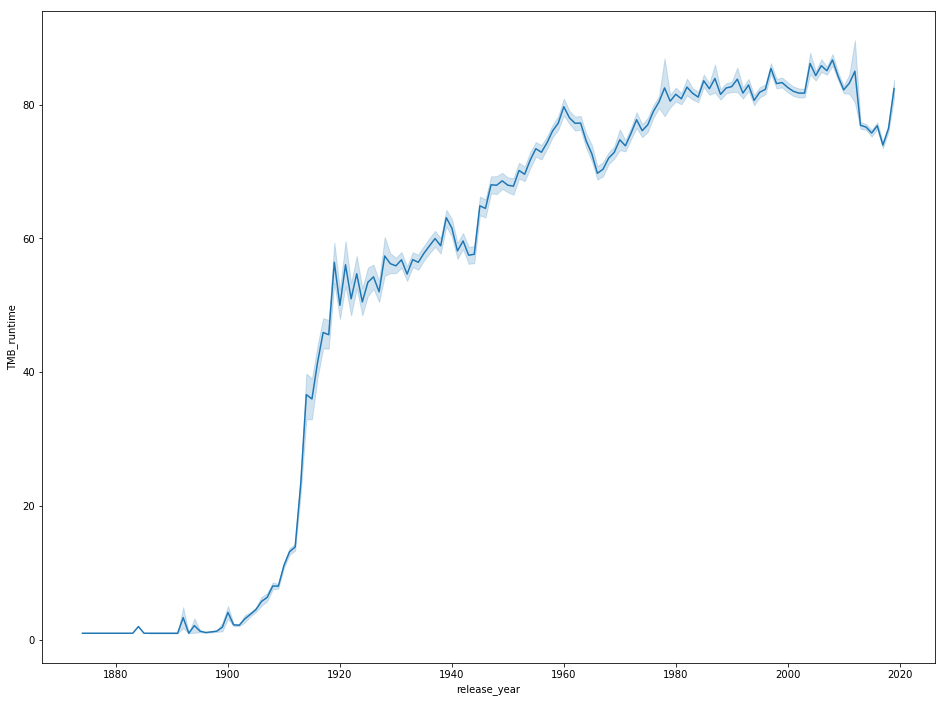

In [26]:
## (1) Release Year x Runtime

plt.figure(figsize=(16,12));
mask = (INT_df["release_year"]<2020)
sns.lineplot(x="release_year", y="TMB_runtime", data=INT_df[mask], ci=68);
# there's one obscenely long movie scheduled for 2020!

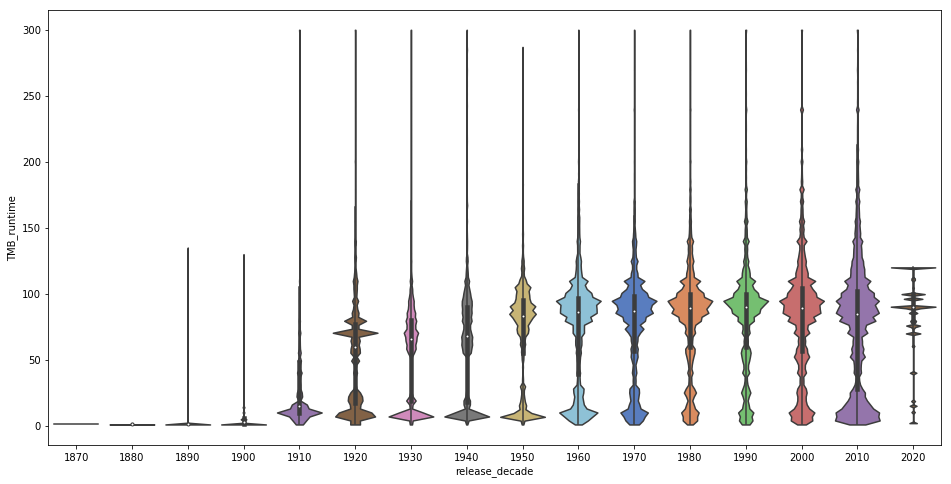

In [29]:
plt.figure(figsize=(16,8));
sns.violinplot(x="release_decade", y="TMB_runtime",
               order = INT_df["release_decade"].value_counts().sort_index().index,
              palette='muted', scale='width', cut=0,bw=.01, data = INT_df[~stupidly_long_movies]);
# probably not the bandwidth granularity to go with, but has a nice Rorschach feel to it "Which of these butterflies would you like to murder while pretending it's your mother?"

<Figure size 1152x576 with 0 Axes>

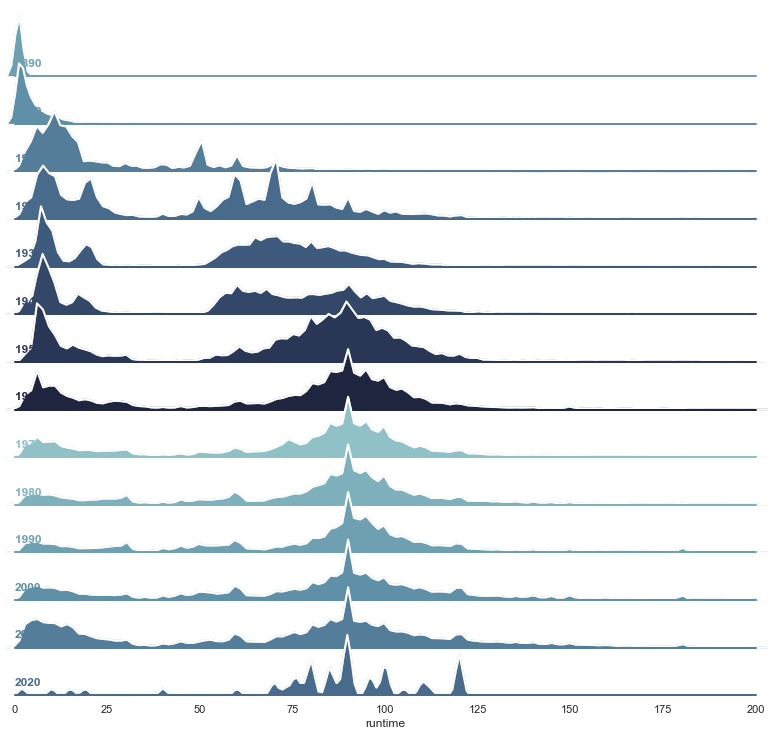

In [30]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# https://seaborn.pydata.org/examples/kde_ridgeplot.html
# yoink!
plt.figure(figsize=(16,8));

# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(runtime=INT_df["TMB_runtime"], g=release_decade)).dropna()
# df.drop(df[df["g"].apply(lambda x: x in ["1890","1900"])].index, inplace=True)
df.drop(df[df["runtime"]>200].index, inplace=True)

# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.75, palette=pal,
                  row_order = ['1890','1900','1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010','2020'], sharey=False);

# Draw the densities in a few steps
g.map(sns.kdeplot, "runtime", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "runtime", clip_on=False, color="w", lw=2, bw=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes);


g.map(label, "runtime");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);
plt.xlim((0,200));

# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
g.despine(bottom=True, left=True);

In [ ]:
####### Looking at the genre data

In [ ]:
## MAKE SINGLE_GENRES (one categorical variable with a single most-specific genre for each movie with genre inf)

int_genres = match(INT_df,"genre__",case_sensitive=True).index

scarcity_ordered_genre_vars = INT_df[int_genres].sum().sort_values().index
no_genre = INT_df[scarcity_ordered_genre_vars].replace(0,np.nan).isnull().all(axis=1)
single_genres = INT_df[scarcity_ordered_genre_vars].astype('float').idxmax(axis=1)
single_genres[no_genre] = np.nan
single_genres = single_genres.apply(lambda x: x.replace("genre__","") if pd.notnull(x) else np.nan)
scarcity_ordered_genre_vars = [x.replace("genre__","") for x in scarcity_ordered_genre_vars]

INT_df["single_genres"]= single_genres

In [ ]:
## same but with fully integrated genres
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":20})



# mask = (INT_df["release_year"]>=1905) & (INT_df["release_year"]<=2020)
mask = INT_df["release_year"].notnull()

df = INT_df[mask].groupby(["single_genres","release_year"])["movieId"].count().reset_index().dropna()
df["release_year"] = df["release_year"].astype('int')
year_sums = df.groupby("release_year").sum()
df = df.set_index("release_year")
df["movieId"] = df["movieId"]/year_sums.loc[df.index,"movieId"]

df = df.reset_index()
df.columns = ["Release Year","Genre","%"]
df["%"] = df["%"] * 100


# Create a grid : initialize it
g = sns.FacetGrid(df, col='Genre', hue='Genre', col_wrap=4, col_order =  scarcity_ordered_genre_vars[::-1])
 
# Add the line over the area with the plot function
g = g.map(plt.plot, "Release Year", '%')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, "Release Year", '%', alpha=0.2).set_titles("{col_name} genre")
 
# Control the title of each facet
g = g.set_titles("{col_name}", fontsize=28)
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('How the composition of movie genres evolves over time', fontsize=24)
 
plt.show()


In [ ]:
df = INT_df[list(int_genres)+["release_year"]].dropna().astype('int').set_index("release_year")
df.columns = [x.replace("TMB_genres_","") for x in df.columns]
df = df.groupby("release_year").sum().sort_index()
df = df.apply(lambda x: 100*x/df.sum(axis=1))

In [ ]:
plt.figure(figsize=(16,8));
plt.style.use('seaborn')
df[["genre__"+x for x in scarcity_ordered_genre_vars][::-1]].plot.area(ax = plt.gca())
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Genre %', fontsize=15)
plt.title('Genre % by Release Year',fontsize=17)
plt.ylim([0,100])

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
# ax.legend( [handles[labels.index(x)] for x in scarcity_ordered_genre_vars[::-1]],  [labels[labels.index(x)] for x in scarcity_ordered_genre_vars[::-1]])
# plt.show()